# INF 552: Machine Learning for Data Informatics

## Homework 7: Generative Models and CNNs

### Jungho Choi (junghoch@usc.edu)

#### 2.Deep CNNs for Image Colorization

(a) This assignment uses a convolutional neural network for image colorization which turns a grayscale image to a colored image. By converting an image to grayscale, we loose color information, so converting a grayscale image back to a colored version is not an easy job. We will use the CIFAR-10 dataset. Downolad the dataset from http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.datasets import cifar10

# Data loading and preprocessing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, nb_classes=10)
y_train = y_train[:,2]
y_test = to_categorical(y_test, nb_classes=10)
y_test = y_test[:,2]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


(b) From the train and test dataset, extract the class birds. We will focus on this class, which has 6000 members.

In [4]:
birds = np.argwhere(y_train==1)
X2_train = X_train[birds.ravel()]

test = np.argwhere(y_test==1)
X2_test = X_test[test.ravel()]

print(X2_train.shape)
print(y_train.shape)
print(X2_test.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(50000,)
(1000, 32, 32, 3)
(10000,)


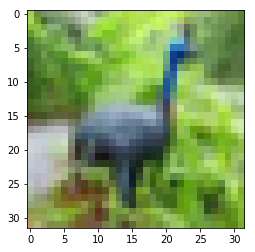

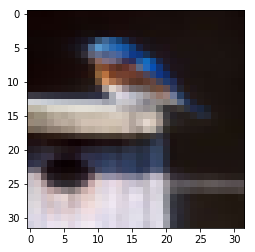

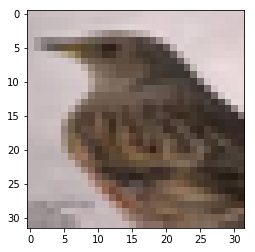

In [5]:
plt.imshow(X2_train[0])
plt.show()
plt.imshow(X2_train[1])
plt.show()
plt.imshow(X2_train[2])
plt.show()

In [4]:
print('Training set : ', X2_train.shape)
print('Test set     : ', X2_test.shape)

('Training set : ', (5000, 32, 32, 3))
('Test set     : ', (1000, 32, 32, 3))


(c) Those 6000 images have 6000 × 32 × 32 pixels. Choose at least 10% of the pixels randomly. It is strongly recommended that you choose a large number or all of the pixels. You will have between P = 614400 and P = 6144000 pixels. Each pixel is an RGB vector with three elements.

In [9]:
print("X1_train size: 5000 * 32 * 32 = " + str(5000 * 32 * 32))
print("X1_test size: 1000 * 32 * 32 = " + str(1000 * 32 * 32))

X1_train size: 5000 * 32 * 32 = 5120000
X1_test size: 1000 * 32 * 32 = 1024000


In [10]:
X1_train = X2_train.reshape(5120000,3)  
X1_test = X2_test.reshape(1024000,3)    

print('Training set : ', X1_train.shape)
print('Test set     : ', X1_test.shape)

('Training set : ', (5120000, 3))
('Test set     : ', (1024000, 3))


(d) Run k-means clustering on the P vectors using k = 4. The centers of the clusters will be your main colors. Convert the colored images to k-color images by converting each pixel’s value to the closest main color in terms of Euclidean distance. These are the outputs of your network, whose each pixel falls in one of those k classes.

In [13]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4, max_iter=1000, random_state=0)
k_means.fit(X1_train)
center_k_means = k_means.cluster_centers_

In [14]:
center_train = center_k_means
print('Training centers : ',center_train)

('Training centers : ', array([[0.42295172, 0.42187529, 0.32134431],
       [0.80645087, 0.82780156, 0.82614268],
       [0.18994147, 0.19343499, 0.14952672],
       [0.61097739, 0.60609819, 0.5250555 ]]))


In [16]:
color_label_train = k_means.predict(X1_train) 
X_train_color = []
counter = 0
for pixel in X1_train:
    X_train_color.append(center_train[color_label_train[counter]])
    counter = counter + 1

In [18]:
k_means2 = KMeans(n_clusters=4,max_iter=1000,random_state=0)
X_test_color = k_means2.fit_transform(X1_test)
center_k_means2 = k_means2.cluster_centers_

In [19]:
center_test = center_k_means2
print('Test centers : ',center_test)

('Test centers : ', array([[0.81448982, 0.83306584, 0.83462615],
       [0.19217558, 0.19792203, 0.15097241],
       [0.43087153, 0.42944888, 0.32642601],
       [0.61095234, 0.61602599, 0.54214401]]))


In [20]:
test_color_label = k_means2.predict(X1_test) 
X_test_color = []
counter = 0
for pixel in X1_test:
    X_test_color.append(center_test[test_color_label[counter]])
    counter += 1

In [21]:
v_X_train_color = np.reshape(X_train_color,(5000,32,32,3)) 
v_X_test_color = np.reshape(X_test_color,(1000,32,32,3))

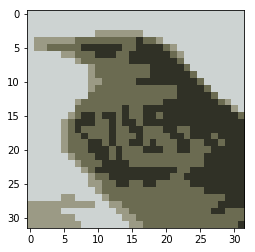

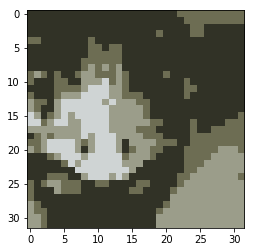

In [22]:
plt.imshow(v_X_train_color[2])
plt.show()
plt.imshow(v_X_test_color[1])
plt.show()

(e) Use any tool (e.g., openCV or scikit-learn) to obtain grayscale 32 × 32 × 1 images from the original 32 × 32 × 3 images. The grayscale images are inputs of your network.

(5000, 32, 32)


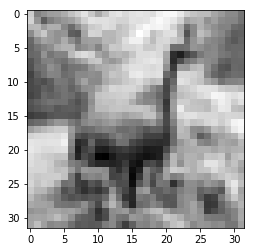

(1000, 32, 32)


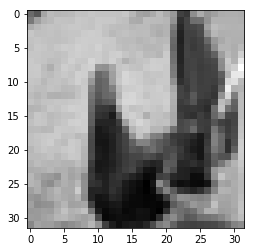

In [23]:
from skimage.color import rgb2gray

X_train_grayscale = rgb2gray(X2_train)
X_test_grayscale = rgb2gray(X2_test)

print (X_train_grayscale.shape)
plt.imshow(X_train_grayscale[0],cmap='gray')
plt.show()

print (X_test_grayscale.shape)
plt.imshow(X_test_grayscale[0],cmap='gray')
plt.show()

(f) Set up a deep convolutional neural network with two convolution layers (or more) and two (or more) MLP layers. Use 5 × 5 filters and a softmax output layer. Determine the number of filters, strides, and whether or not to use padding yourself. Use a minimum of one max pooling layer. Use a classification scheme, which means your output must determine one of the k = 4 color classes for each pixel in your grayscale image. Your input is a grayscale version of an image (32 × 32 × 1) and the output is 32 × 32 × 4. The output assigns one of the k = 4 colors to each of the 32 × 32 pixels; therefore, each of the pixels is classified into one of the classes [1 0 0 0], [0 1 0 0], [0 0 1 0], [0 0 0 1]. After each pixel is classified into one of the main colors, the RGB code of that color can be assigned to the pixel. For example, if the third main color is [255 255 255] and pixel (32,32) of an image has the one-hot encoded class [0 0 1 0], i.e it was classified as the third color, the (32,32) place in the output can be associated with [255 255 255]. The size of the output of the convolutional part, c1 × c2 depends on the size of the convolutional layers you choose and is a feature map, which is a matrix. That matrix must be flattened or reshaped, i.e. must be turned into a vector of size c1c2 ×1, before it is fed to the MLP part. Choose the number of neurons in the first layer of the MLP (and any other hidden layers, if you are willing to have more than one hidden layer) yourself, but the last layer must have 32 × 32 × 4 = 4096 neurons, each of which represents a pixel being in one of the k = 4 classes. Add a softmax layer which will choose the highest value out of its k = 4 inputs for each of the 1024 pixels; therefore, the output of the MLP has to be reshaped into a 32 × 32 × 4 matrix, and to get the colored image, the RGB vector of each of the k = 4 classes has to be converted to the RGB vector, so an output image will be 32 × 32 × 3. Train at least for 5 epochs (30 epochs is strongly recommended). Plot training, (validation), and test errors in each epoch. Report the train and test errors and visually compare the artificially colored versions of the first 10 images in the test set with the original images.

In [24]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [27]:
model = Sequential()
model.add(Conv2D(16,strides=1, kernel_size=(5, 5), input_shape=(32,32,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(32,strides=1, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense((2048),activation='relu'))
model.add(Dense((4096),activation='softmax')) # 32x32x4
model.summary()
adam_optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              8392704   
Total para

In [28]:
filename = "model_{epoch:02d}_{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filename, verbose = 1, save_best_only = False, 
                                       save_weights_only = False, period = 1)

In [29]:
X_train_gray = np.reshape(X_train_grayscale,(len(X_train_grayscale),32,32,1))
X_test_gray = np.reshape(X_test_grayscale,(len(X_test_grayscale),32,32,1))

print (X_train_gray.shape)
print (X_test_gray.shape)

(5000, 32, 32, 1)
(1000, 32, 32, 1)


In [32]:
train_color_label = k_means.predict(X1_train) 
onehot_encoding = {0:[1,0,0,0],1:[0,1,0,0],2:[0,0,1,0],3:[0,0,0,1]}

X_train_ground = []
counter = 0
for pixel in X1_train:
    X_train_ground.append(onehot_encoding[train_color_label[counter]])
    counter += 1
print (np.array(X_train_ground).shape)
X_train_ground = np.reshape(X_train_ground,(5000,4096))
print (X_train_ground.shape)

(5120000, 4)
(5000, 4096)


In [33]:
test_color_label = k_means2.predict(X1_test) 

X_test_ground = []
counter = 0
for pixel in X1_test:
    X_test_ground.append(onehot_encoding[test_color_label[counter]])
    counter += 1

print (np.array(X_test_ground).shape)
X_test_ground = np.reshape(X_test_ground,(1000,4096))
print (X_test_ground.shape)

(1024000, 4)
(1000, 4096)


In [36]:
train_val = model.fit(X_train_gray, X_train_ground,
                      batch_size=4,
                      epochs=5,
                      verbose=1,
                      shuffle=True,validation_split=0.1,callbacks=[checkpoint])

Train on 4500 samples, validate on 500 samples
Epoch 1/5
4500/4500 [==============================] - 141s - loss: 7961.5469 - val_loss: 7916.2164
Epoch 2/5
4500/4500 [==============================] - 156s - loss: 7898.1204 - val_loss: 7901.1243
Epoch 3/5
4500/4500 [==============================] - 169s - loss: 7849.1667 - val_loss: 7863.6805
Epoch 4/5
4500/4500 [==============================] - 163s - loss: 7818.1537 - val_loss: 7880.7891
Epoch 5/5
4500/4500 [==============================] - 151s - loss: 7787.6915 - val_loss: 7846.0292


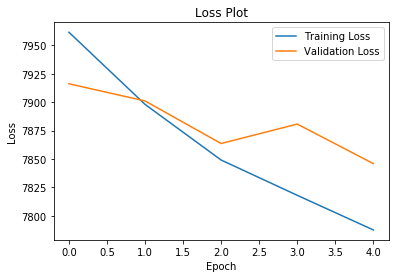

In [45]:
train_val_list = train_val.history
plt.title("Loss Plot")
plt.plot(train_val_list['loss'])
plt.plot(train_val_list['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.show()

In [52]:
best = keras.models.load_model("model_01_7898.1204.hdf5")
pred_images = best.predict(X_test_gray[:10])
pred_images = np.reshape(pred_images,(10240,4))
output = []
for pixels in pred_images:
    output.append(center_test[np.argmax(pixels)])
output = np.reshape(output,(10,32,32,3))

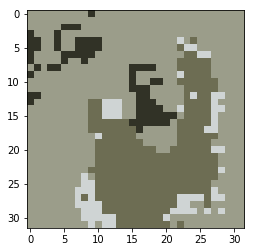

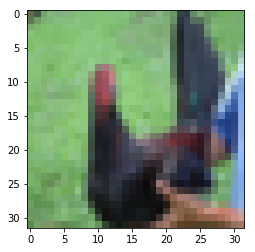

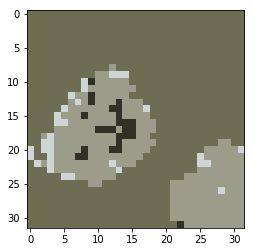

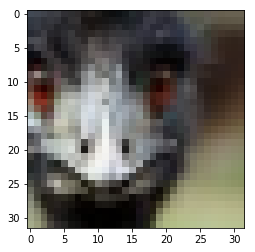

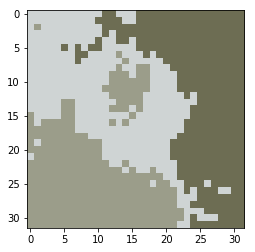

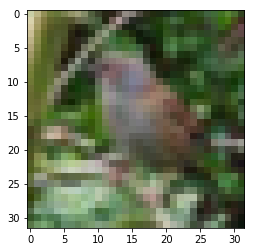

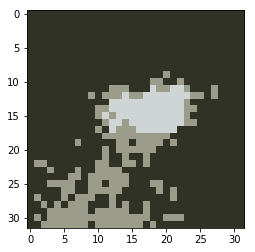

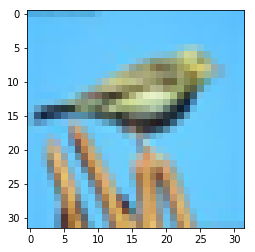

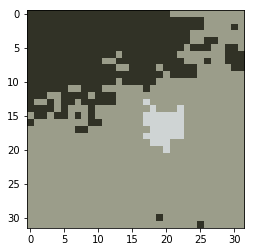

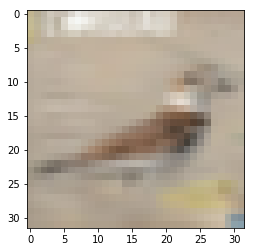

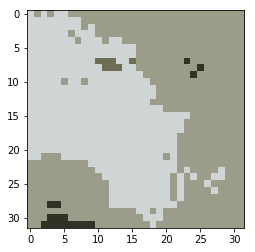

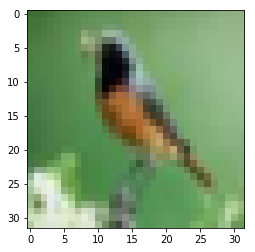

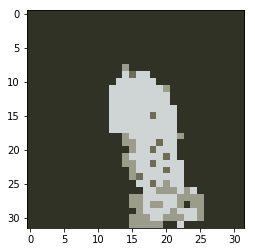

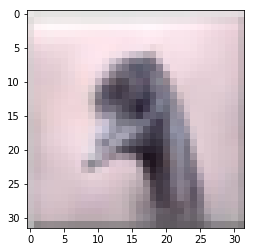

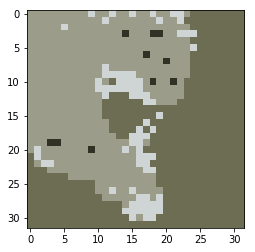

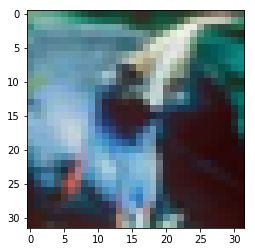

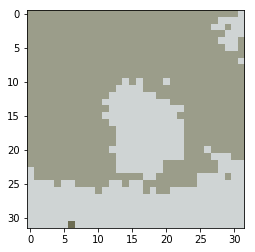

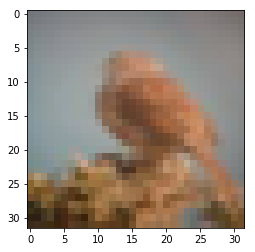

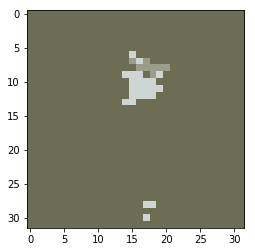

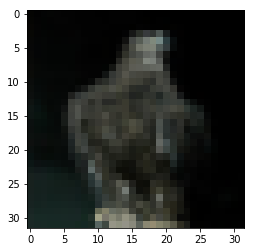

In [56]:
for i in range(10):
    plt.imshow(output[i])
    plt.show()

    plt.imshow(X2_test[i])
    plt.show()